In [126]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
import json
import numpy as np
import matplotlib as mpl
import pandas as pd

plt.style.use('seaborn-v0_8-colorblind')
mpl.rcParams["hatch.color"] = 'white'

In [127]:
splits = ["dev", "devtest"]

## Parity

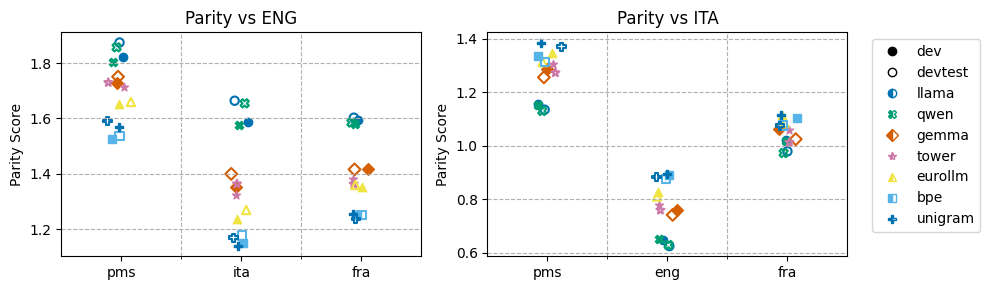

In [144]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
models = ["llama", "qwen", "gemma", "tower", "eurollm", "bpe", "unigram"]
markers = ['o', 'X', 'D', '*', '^', 's', 'P']

for ax, ref_lang in zip(axs, ["eng", "ita"]):
    if ref_lang == "eng":
        langs = ["pms", "ita", "fra"]
    else:
        langs = ["pms", "eng", "fra"]
    for i, model in enumerate(models):
        if not os.path.exists(f"results/parity/{model}.dev.jsonl"):
            dev_points = [-1 for _ in langs]
        else:
            dev = json.load(open(f"results/parity/{model}.dev.jsonl"))
            dev_points = [dev.get(f'parity_{l}_vs_{ref_lang}', -1) for l in langs]
        if not os.path.exists(f"results/parity/{model}.devtest.jsonl"):
            devtest_points = [-1 for _ in langs]
        else:
            devtest = json.load(open(f"results/parity/{model}.devtest.jsonl"))
            devtest_points = [devtest.get(f'parity_{l}_vs_{ref_lang}', -1) for l in langs]
        xs = np.array([1,2,3]) + np.random.normal(0, 0.05, size=3)-0.025
        ax.scatter(xs, dev_points, label=f"{model} dev", marker=mpl.markers.MarkerStyle(markers[i], fillstyle="full"), c=f"C{i}", alpha=1)
        xs = np.array([1,2,3]) + np.random.normal(0, 0.05, size=3)-0.025
        ax.scatter(xs, devtest_points, label=f"{model} devtest", marker=mpl.markers.MarkerStyle(markers[i], fillstyle="none"), c=f"C{i}", alpha=1)
    ax.set_xticks([1,2,3], labels=langs)
    ax.set_ylabel("Parity Score")
    ax.set_title(f"Parity vs {ref_lang.upper()}")
    ax.grid(True, axis='y', linestyle='--')
    ax.grid(True, axis='x', linestyle='--', which='minor')
    ax.set_xticks([1.5,2.5], minor=True)
    ax.set_xlim(0.5, 3.5)

# colors = [mpatches.Patch(color=f"C{i}") for i in range(len(models))]
# markers = [plt.plot([], [], m, markerfacecolor='k', markeredgecolor='k')[0] for m in ['o', 'x']] 
# ax.legend(colors + markers, models + splits, loc='upper left', bbox_to_anchor=(1.05, 0.75))

model_labels = [plt.plot([], [], ls="", markerfacecoloralt='w', marker=mpl.markers.MarkerStyle(markers[i], fillstyle="left"))[0] for i in range(len(markers))]
set_labels = [plt.plot([], [], c='k', ls="", marker=mpl.markers.MarkerStyle(markers[0], fillstyle=fill))[0] for fill in ['full', 'none']]
ax.legend(set_labels + model_labels, splits + models, loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.savefig("plots/parity_scores.pdf")
plt.show()


## Classification

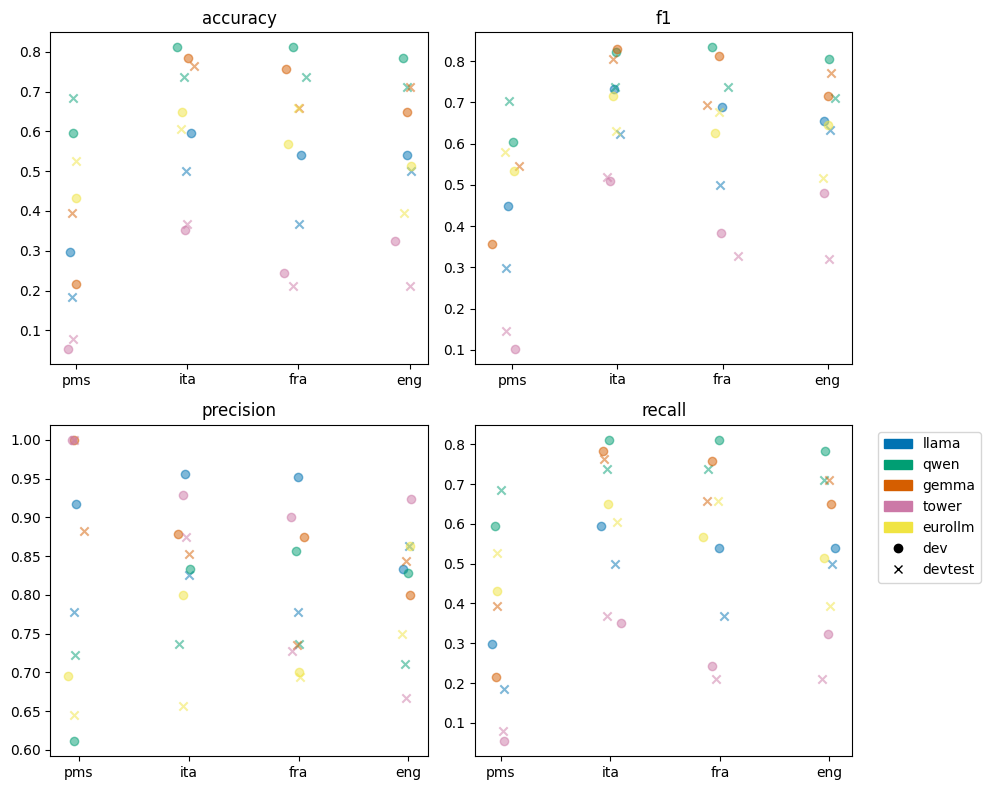

In [67]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
models = ["llama", "qwen", "gemma", "tower", "eurollm"]
langs = ["pms", "ita", "fra", "eng"]
for ax, metric in zip(axs.flat, ["accuracy", "f1", "precision", "recall"]):
    for i, model in enumerate(models):
        dev_points = []
        devtest_points = []
        for lang in langs:
            if not os.path.exists(f"results/classification/{model}.{lang}.dev.jsonl.scores"):
                dev_points.append(-1)
            else:
                dev = json.load(open(f"results/classification/{model}.{lang}.dev.jsonl.scores"))
                dev_points.append(dev.get(metric, {}).get("score", -1))
            if not os.path.exists(f"results/classification/{model}.{lang}.devtest.jsonl.scores"):
                devtest_points.append(-1)
            else:
                devtest = json.load(open(f"results/classification/{model}.{lang}.devtest.jsonl.scores"))
                devtest_points.append(devtest.get(metric, {}).get("score", -1))
        xs = np.array([1,2,3,4]) + np.random.normal(0, 0.05, size=4)-0.025
        ax.scatter(xs, dev_points, label=f"{model} dev", marker='o', c=f"C{i}", alpha=0.5)
        xs = np.array([1,2,3,4]) + np.random.normal(0, 0.05, size=4)-0.025
        ax.scatter(xs, devtest_points, label=f"{model} devtest", marker='x', c=f"C{i}", alpha=0.5)
    ax.set_xticks([1,2,3,4], labels=langs)
    ax.set_title(metric)
colors = [mpatches.Patch(color=f"C{i}") for i in range(len(models))]
markers = [plt.plot([], [], m, markerfacecolor='k', markeredgecolor='k')[0] for m in ['o', 'x']] 
ax.legend(colors + markers, models + splits, loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()


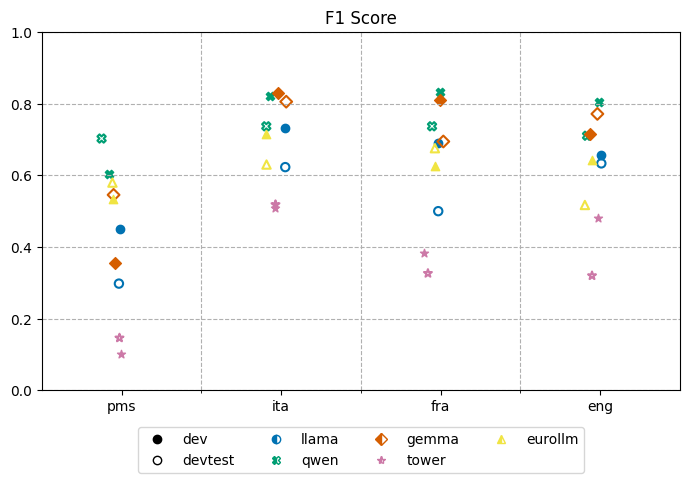

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))
models = ["llama", "qwen", "gemma", "tower", "eurollm"]
langs = ["pms", "ita", "fra", "eng"]
metric = "f1"
score_file ="results/classification/{model}.{lang}.{split}.jsonl.scores"
markers = ['o', 'X', 'D', '*', '^']
for i, model in enumerate(models):
    dev_points = []
    devtest_points = []
    for lang in langs:
        dev_file = score_file.format(model=model, lang=lang, split="dev")
        devtest_file = score_file.format(model=model, lang=lang, split="devtest")
        if not os.path.exists(dev_file):
            dev_points.append(-1)
        else:
            dev = json.load(open(dev_file))
            dev_points.append(dev.get(metric, {}).get("score", -1))
        if not os.path.exists(devtest_file):
            devtest_points.append(-1)
        else:
            devtest = json.load(open(devtest_file))
            devtest_points.append(devtest.get(metric, {}).get("score", -1))
    xs = np.array([1,2,3,4]) + np.random.normal(0, 0.05, size=4)-0.025
    ax.scatter(xs, dev_points, label=f"{model} dev", marker=mpl.markers.MarkerStyle(markers[i], fillstyle="full"), c=f"C{i}", alpha=1)
    xs = np.array([1,2,3,4]) + np.random.normal(0, 0.05, size=4)-0.025
    ax.scatter(xs, devtest_points, label=f"{model} devtest", marker=mpl.markers.MarkerStyle(markers[i], fillstyle="none"), c=f"C{i}", alpha=1)
ax.set_xticks([1,2,3,4], labels=langs)
ax.set_title("F1 Score")
model_labels = [plt.plot([], [], ls="", markerfacecoloralt='w', marker=mpl.markers.MarkerStyle(markers[i], fillstyle="left"))[0] for i in range(len(markers))]
set_labels = [plt.plot([], [], c='k', ls="", marker=mpl.markers.MarkerStyle(markers[0], fillstyle=fill))[0] for fill in ['full', 'none']]
ax.legend(set_labels + model_labels, splits + models, loc='lower center', ncols=4, bbox_to_anchor=(0.5, -0.25))
ax.grid(True, axis='y', linestyle='--')
ax.grid(True, axis='x', linestyle='--', which='minor')
ax.set_xticks([1.5,2.5,3.5], minor=True)
ax.set_ylim(0, 1)
ax.set_xlim(0.5, 4.5)
plt.tight_layout()
plt.savefig("plots/classification_f1_scores.pdf")
plt.show()


## MT

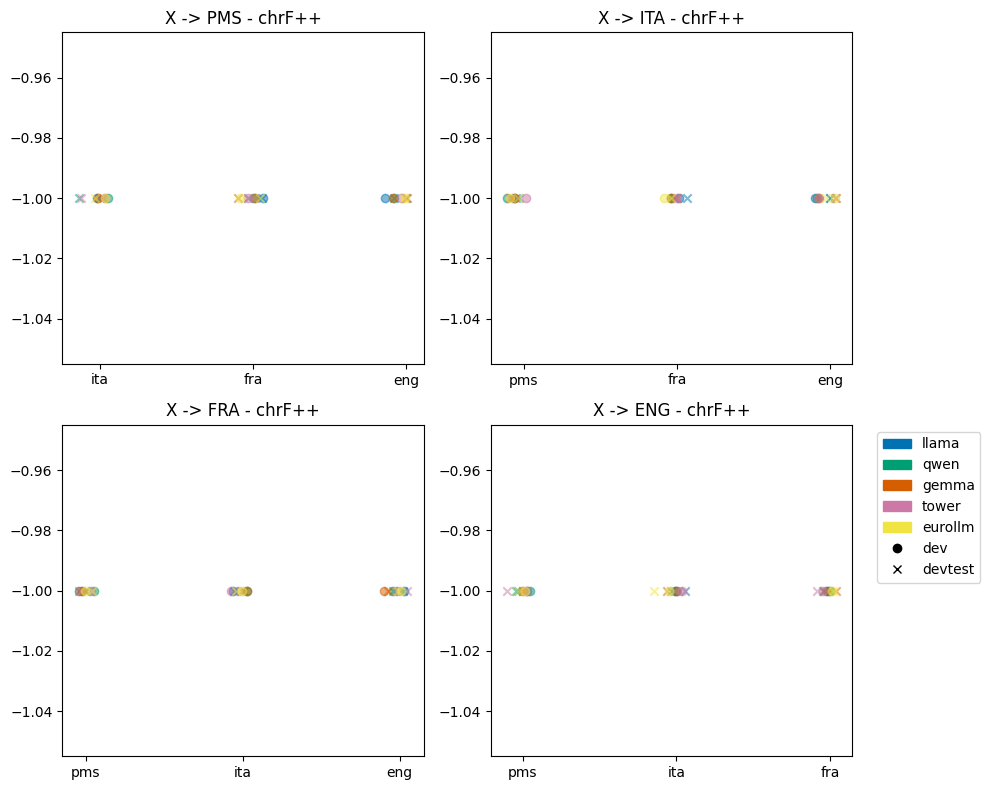

In [145]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
models = ["llama", "qwen", "gemma", "tower", "eurollm"]
langs = ["pms", "ita", "fra", "eng"]
score_file ="results/translation/{model}.{from_lang}_{to_lang}.{split}.jsonl.scores"

metric = "chrf++"
for ax, to_lang in zip(axs.flat, langs):
    for i, model in enumerate(models):
        dev_points = []
        devtest_points = []        
        for from_lang in langs:
            if from_lang == to_lang:
                continue
            dev_file = score_file.format(model=model, from_lang=from_lang, to_lang=to_lang, split="dev")
            devtest_file = score_file.format(model=model, from_lang=from_lang, to_lang=to_lang, split="devtest")
            if not os.path.exists(dev_file):
                dev_points.append(-1)
            else:
                dev = json.load(open(dev_file))
                dev_points.append(dev.get(metric, {}).get("score", -1))
            if not os.path.exists(devtest_file):
                devtest_points.append(-1)
            else:
                devtest = json.load(open(devtest_file))
                devtest_points.append(devtest.get(metric, {}).get("score", -1))
        xs = np.array(range(len(dev_points))) + 1 + np.random.normal(0, 0.05, size=len(dev_points))-0.025
        ax.scatter(xs, dev_points, label=f"{model} dev", marker='o', c=f"C{i}", alpha=0.5)
        xs = np.array(range(len(devtest_points))) + 1 + np.random.normal(0, 0.05, size=len(devtest_points))-0.025
        ax.scatter(xs, devtest_points, label=f"{model} devtest", marker='x', c=f"C{i}", alpha=0.5)
    ax.set_xticks([1,2,3,], labels=[i for i in langs if i != to_lang])
    ax.set_title(f"X -> {to_lang.upper()} - chrF++")
colors = [mpatches.Patch(color=f"C{i}") for i in range(len(models))]
markers = [plt.plot([], [], m, markerfacecolor='k', markeredgecolor='k')[0] for m in ['o', 'x']] 
ax.legend(colors + markers, models + splits, loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.savefig("plots/translation_to_eng.png")
plt.show()


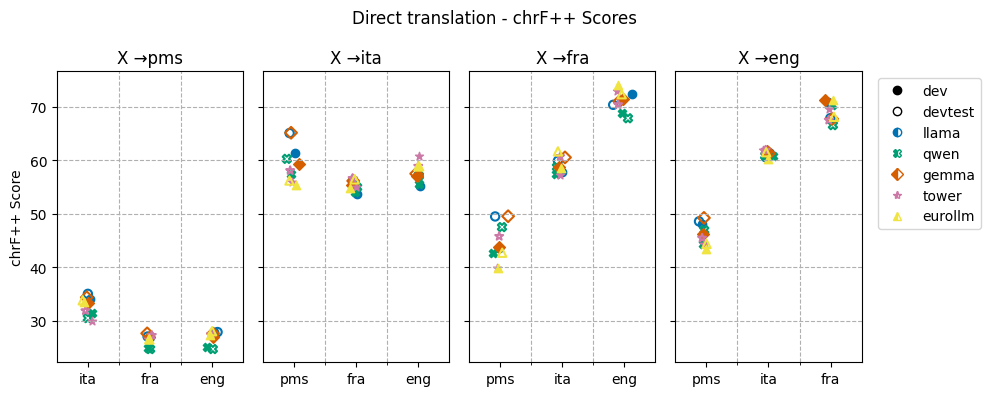

In [150]:
fig, axs = plt.subplots(1, 4, figsize=(10, 4), sharey=True)
models = ["llama", "qwen", "gemma", "tower", "eurollm"]
langs = ["pms", "ita", "fra", "eng"]
score_file ="results/translation/{model}.{split}.{from_lang}_{to_lang}.jsonl.scores"
markers = ['o', 'X', 'D', '*', '^']
metric = "chrf++"
for ax, to_lang in zip(axs.flat, langs):
    ax.set_title(f"X →{to_lang}")
    for i, model in enumerate(models):
        x=1
        from_langs = [i for i in langs if i != to_lang]
        for from_lang in from_langs:
            dev_points = []
            devtest_points = []   
            dev_file = score_file.format(model=model, from_lang=from_lang, to_lang=to_lang, split="dev")
            devtest_file = score_file.format(model=model, from_lang=from_lang, to_lang=to_lang, split="devtest")
            if not os.path.exists(dev_file):
                dev_points.append(-1)
            else:
                dev = json.load(open(dev_file))
                dev_points.append(dev.get(metric, {}).get("score", -1))
            if not os.path.exists(devtest_file):
                devtest_points.append(-0.5)
            else:
                devtest = json.load(open(devtest_file))
                devtest_points.append(devtest.get(metric, {}).get("score", -1))
            # ax.bar([x], dev_points, width=0.5, color=f"C{i}", alpha=0.5, hatch='xx')
            # ax.bar([x+0.5], devtest_points, width=0.5, color=f"C{i}", alpha=0.5, hatch='..')
            ax.scatter([x] + np.random.normal(0, 0.05, size=1)-0.025, dev_points, marker=mpl.markers.MarkerStyle(markers[i], fillstyle="full"), c=f"C{i}", alpha=1)
            ax.scatter([x] + np.random.normal(0, 0.05, size=1)-0.025, devtest_points,marker=mpl.markers.MarkerStyle(markers[i], fillstyle="none"), c=f"C{i}", alpha=1)
            x += 1
        ax.set_xticks([i+1 for i in range(len(from_langs))], labels=from_langs)
        ax.set_xlim(0.5, len(from_langs)+0.5)
        ax.set_xticks([i+1.5 for i in range(len(from_langs)-1)], minor=True)
        ax.grid(True, axis='y', linestyle='--')
        ax.grid(True, axis='x', linestyle='--', which='minor')

    # x += 1
# ax.set_xticks(np.arange(8.25, x, 16), labels=[f"X→{lang}" for lang in langs])
axs[0].set_ylabel("chrF++ Score")
fig.suptitle("Direct translation - chrF++ Scores")
# model_labels = [mpatches.Patch(color=f"C{i}") for i in range(len(models))]
# set_labels = [mpatches.Patch(color=f"k", hatch=i, fill=False) for i in ['xx', '..']]
# axs[-1].legend(set_labels + model_labels, splits + models, loc='upper left', bbox_to_anchor=(1.05, 1))

model_labels = [plt.plot([], [], ls="", markerfacecoloralt='w', marker=mpl.markers.MarkerStyle(markers[i], fillstyle="left"))[0] for i in range(len(markers))]
set_labels = [plt.plot([], [], c='k', ls="", marker=mpl.markers.MarkerStyle(markers[0], fillstyle=fill))[0] for fill in ['full', 'none']]
ax.legend(set_labels + model_labels, splits + models, loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.savefig("plots/translation_chrf.pdf")
plt.show()


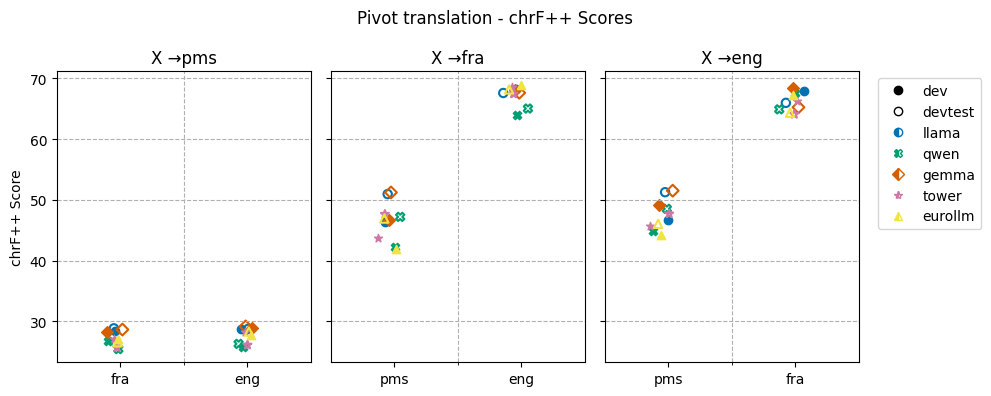

In [155]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4), sharey=True)
models = ["llama", "qwen", "gemma", "tower", "eurollm"]
langs = ["pms", "fra", "eng"]
score_file ="results/translation/{model}.{split}.{from_lang}_{to_lang}.pivot_ita.jsonl.scores"
markers = ['o', 'X', 'D', '*', '^']
metric = "chrf++"
for ax, to_lang in zip(axs.flat, langs):
    ax.set_title(f"X →{to_lang}")
    for i, model in enumerate(models):
        x=1
        from_langs = [i for i in langs if i != to_lang]
        for from_lang in from_langs:
            dev_points = []
            devtest_points = []   
            dev_file = score_file.format(model=model, from_lang=from_lang, to_lang=to_lang, split="dev")
            devtest_file = score_file.format(model=model, from_lang=from_lang, to_lang=to_lang, split="devtest")
            if not os.path.exists(dev_file):
                dev_points.append(-1)
            else:
                dev = json.load(open(dev_file))
                dev_points.append(dev.get(metric, {}).get("score", -1))
            if not os.path.exists(devtest_file):
                devtest_points.append(-0.5)
            else:
                devtest = json.load(open(devtest_file))
                devtest_points.append(devtest.get(metric, {}).get("score", -1))
            # ax.bar([x], dev_points, width=0.5, color=f"C{i}", alpha=0.5, hatch='xx')
            # ax.bar([x+0.5], devtest_points, width=0.5, color=f"C{i}", alpha=0.5, hatch='..')
            ax.scatter([x] + np.random.normal(0, 0.05, size=1)-0.025, dev_points, marker=mpl.markers.MarkerStyle(markers[i], fillstyle="full"), c=f"C{i}", alpha=1)
            ax.scatter([x] + np.random.normal(0, 0.05, size=1)-0.025, devtest_points,marker=mpl.markers.MarkerStyle(markers[i], fillstyle="none"), c=f"C{i}", alpha=1)
            x += 1
        ax.set_xticks([i+1 for i in range(len(from_langs))], labels=from_langs)
        ax.set_xlim(0.5, len(from_langs)+0.5)
        ax.set_xticks([i+1.5 for i in range(len(from_langs)-1)], minor=True)
        ax.grid(True, axis='y', linestyle='--')
        ax.grid(True, axis='x', linestyle='--', which='minor')

    # x += 1
# ax.set_xticks(np.arange(8.25, x, 16), labels=[f"X→{lang}" for lang in langs])
axs[0].set_ylabel("chrF++ Score")
fig.suptitle("Pivot translation - chrF++ Scores")
# model_labels = [mpatches.Patch(color=f"C{i}") for i in range(len(models))]
# set_labels = [mpatches.Patch(color=f"k", hatch=i, fill=False) for i in ['xx', '..']]
# axs[-1].legend(set_labels + model_labels, splits + models, loc='upper left', bbox_to_anchor=(1.05, 1))

model_labels = [plt.plot([], [], ls="", markerfacecoloralt='w', marker=mpl.markers.MarkerStyle(markers[i], fillstyle="left"))[0] for i in range(len(markers))]
set_labels = [plt.plot([], [], c='k', ls="", marker=mpl.markers.MarkerStyle(markers[0], fillstyle=fill))[0] for fill in ['full', 'none']]
ax.legend(set_labels + model_labels, splits + models, loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.savefig("plots/pivot_translation_chrf.pdf")
plt.show()


In [ ]:
import itertools
import pandas as pd
models = ["llama", "qwen", "gemma", "tower", "eurollm"]
langs = ["pms", "ita", "fra", "eng"]
average_dev = {
    "bleu": pd.DataFrame(columns=langs, index=langs),
    "chrf++": pd.DataFrame(columns=langs, index=langs),
    "ter": pd.DataFrame(columns=langs, index=langs),
    "comet": pd.DataFrame(columns=langs, index=langs),
}
average_devtest = {
    "bleu": pd.DataFrame(columns=langs, index=langs),
    "chrf++": pd.DataFrame(columns=langs, index=langs),
    "ter": pd.DataFrame(columns=langs, index=langs),
    "comet": pd.DataFrame(columns=langs, index=langs),
}

for metric in ["bleu", "chrf++", "ter", "comet"]:
    for l1, l2 in itertools.permutations(langs, 2):
        for i, model in enumerate(models):
            dev_points = []
            devtest_points = []
            if not os.path.exists(f"results/translation.{model}.dev.{l1}_{l2}.jsonl.scores"):
                dev_points.append(-1)
            else:
                dev = json.load(open(f"results/translation.{model}.dev.{l1}_{l2}.jsonl.scores"))
                dev_points.append(dev.get(metric, -1))
            if not os.path.exists(f"results/translation.{model}.devtest.{l1}_{l2}.jsonl.scores"):
                devtest_points.append(-1)
            else:
                devtest = json.load(open(f"results/translation.{model}.devtest.{l1}_{l2}.jsonl.scores"))
                devtest_points.append(devtest.get(metric, -1))
        average_dev[metric].loc[l1, l2] = sum(dev_points)/len(dev_points)
        average_devtest[metric].loc[l1, l2] = sum(devtest_points)/len(devtest_points)

In [64]:
average_dev['chrf++']

,pms,ita,fra,eng
pms,NaN,55.264044,39.805568,43.390276
ita,33.480804,NaN,58.549579,60.177186
fra,26.470914,54.840357,NaN,71.306909
eng,27.369355,58.915192,74.133244,NaN


In [65]:
average_devtest['chrf++']

,pms,ita,fra,eng
pms,NaN,56.187226,42.693694,44.337732
ita,33.534918,NaN,61.639783,61.48376
fra,26.469909,56.409639,NaN,68.104465
eng,27.98021,58.836284,72.316442,NaN
